In [1]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import seaborn as sns
import matplotlib.patches as mpatches
import plotly.express as px 
import plotly.graph_objects as go

In [2]:
dataFile = "static/data/MNEducationDashboard.csv"

In [3]:
mned_df = pd.read_csv(dataFile)
mned_df.head()

,id,districtname,admtotal,generalfundexpends,perpupilexpends,avgteachersalary,readingproficiency,total_enroll,female_pct,male_pct,...,nocomp_cnt,nocomp_pct,yescomp_cnt,yescomp_pct,nointernet_cnt,nointernet_pct,yesinternet_cnt,yesinternet_pct,lat,lng
0,2799999,State of Minnesota,868137.24,9638187419,11102.15,61362,59.174286,889304,48.49,51.51,...,208684,8.792840,2164656,91.207160,283696,11.587223,2164656,88.412777,46.729600,-94.685900
1,2702760,Aitkin Public School District,1177.69,12036522,10220.45,55454,57.638571,1186,47.39,52.61,...,741,13.834951,4615,86.165049,1076,18.907046,4615,81.092954,46.564144,-93.648930
2,2721240,Minneapolis Public School District,34088.09,439046660,12879.77,70659,46.480000,35580,48.65,51.35,...,14852,7.869652,173873,92.130348,22649,11.524918,173873,88.475082,44.963324,-93.268320
3,2714010,Hill City Public School District,264.67,3787461,14310.13,55552,46.282857,267,50.19,49.81,...,124,14.318707,742,85.681293,196,20.895522,742,79.104478,46.952798,-93.523779
4,2719170,McGregor Public School District,464.30,5596677,12054.01,50071,49.258571,480,47.08,52.92,...,315,13.224181,2067,86.775819,457,18.106181,2067,81.893819,46.577144,-93.238742


In [20]:
mned_df=mned_df.rename(columns={"districtname": "District", "admtotal":"Enrollment", "generalfundexpends": "General Fund Expenditures", "readingproficiency": "Reading Proficiency", "perpupilexpends": "Per Pupil Expenditures"})
mned_df.head()

,id,District,Enrollment,General Fund Expenditures,Per Pupil Expenditures,avgteachersalary,Reading Proficiency,total_enroll,female_pct,male_pct,...,nocomp_cnt,nocomp_pct,yescomp_cnt,yescomp_pct,nointernet_cnt,nointernet_pct,yesinternet_cnt,yesinternet_pct,lat,lng
1,2702760,Aitkin Public School District,1177.69,12036522,10220.45,55454,57.638571,1186,47.39,52.61,...,741,13.834951,4615,86.165049,1076,18.907046,4615,81.092954,46.564144,-93.648930
2,2721240,Minneapolis Public School District,34088.09,439046660,12879.77,70659,46.480000,35580,48.65,51.35,...,14852,7.869652,173873,92.130348,22649,11.524918,173873,88.475082,44.963324,-93.268320
3,2714010,Hill City Public School District,264.67,3787461,14310.13,55552,46.282857,267,50.19,49.81,...,124,14.318707,742,85.681293,196,20.895522,742,79.104478,46.952798,-93.523779
4,2719170,McGregor Public School District,464.30,5596677,12054.01,50071,49.258571,480,47.08,52.92,...,315,13.224181,2067,86.775819,457,18.106181,2067,81.893819,46.577144,-93.238742
5,2733270,South St. Paul Public School District,3419.29,34984783,10231.59,65558,45.061429,3548,48.31,51.69,...,898,10.138873,7959,89.861127,1097,12.113516,7959,87.886484,44.888027,-93.040497


In [12]:
mned_df.drop(mned_df[mned_df["id"] == 2799999].index, inplace = True)
mned_df.head()

,id,District,admtotal,General Fund Expenditures,Per Pupil Expenditures,avgteachersalary,Reading Proficiency,total_enroll,female_pct,male_pct,...,nocomp_cnt,nocomp_pct,yescomp_cnt,yescomp_pct,nointernet_cnt,nointernet_pct,yesinternet_cnt,yesinternet_pct,lat,lng
1,2702760,Aitkin Public School District,1177.69,12036522,10220.45,55454,57.638571,1186,47.39,52.61,...,741,13.834951,4615,86.165049,1076,18.907046,4615,81.092954,46.564144,-93.648930
2,2721240,Minneapolis Public School District,34088.09,439046660,12879.77,70659,46.480000,35580,48.65,51.35,...,14852,7.869652,173873,92.130348,22649,11.524918,173873,88.475082,44.963324,-93.268320
3,2714010,Hill City Public School District,264.67,3787461,14310.13,55552,46.282857,267,50.19,49.81,...,124,14.318707,742,85.681293,196,20.895522,742,79.104478,46.952798,-93.523779
4,2719170,McGregor Public School District,464.30,5596677,12054.01,50071,49.258571,480,47.08,52.92,...,315,13.224181,2067,86.775819,457,18.106181,2067,81.893819,46.577144,-93.238742
5,2733270,South St. Paul Public School District,3419.29,34984783,10231.59,65558,45.061429,3548,48.31,51.69,...,898,10.138873,7959,89.861127,1097,12.113516,7959,87.886484,44.888027,-93.040497


In [13]:
# plt.scatter(mned_df["Per Pupil Expenditures"], mned_df["Reading Proficiency"])
# plt.xlabel("Per Pupil Expenditures", fontsize=14)
# plt.ylabel("Reading Proficiency", fontsize=14)
# plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

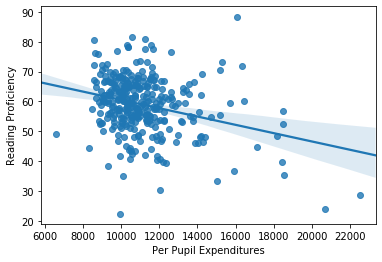

In [14]:
sns.regplot(x=mned_df["Per Pupil Expenditures"], y = mned_df["Reading Proficiency"])
sns.plt.show()

In [15]:
import plotly.express as px

# Use directly Columns as argument. You can use tab completion for this!
fig = px.scatter(mned_df, x=mned_df["Per Pupil Expenditures"], y=mned_df["Reading Proficiency"], color=mned_df["Reading Proficiency"], hover_data=[mned_df["District"]], title="Reading Proficiency (%) vs. Per Pupil Expenditures ($) by School District", trendline="ols")
fig.show()
plt.savefig("static/images/readProfvsPerPupilExpend.png")

<Figure size 432x288 with 0 Axes>

In [16]:
with open('scatterplot.html', 'w') as f:
    f.write(fig.to_html(include_plotlyjs='cdn'))

In [18]:
fig = px.scatter(mned_df, x=mned_df["General Fund Expenditures"], y=mned_df["Reading Proficiency"], color=mned_df["Reading Proficiency"], hover_data=[mned_df["District"]], title="Reading Proficiency (%) vs. General Fund Expenditures ($) by School District", log_x=True, trendline="ols")
fig.show()
plt.savefig("static/images/readProfvsGenFundExpend.png")

<Figure size 432x288 with 0 Axes>

In [19]:
with open('scatterplot2.html', 'w') as f:
    f.write(fig.to_html(include_plotlyjs='cdn'))

In [22]:
fig = px.scatter(mned_df, x=mned_df["Enrollment"], y=mned_df["Reading Proficiency"], color=mned_df["Reading Proficiency"], hover_data=[mned_df["District"]], title="Reading Proficiency (%) vs. Enrollment by School District", log_x=True, trendline="ols")
fig.show()
plt.savefig("static/images/readProfvsEnrollment.png")

<Figure size 432x288 with 0 Axes>

In [23]:
with open('scatterplot3.html', 'w') as f:
    f.write(fig.to_html(include_plotlyjs='cdn'))